# Section 2: Macroindicadores

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from itertools import zip_longest as zip
from itertools import count
import numpy as np
import codecs

## A. Writing Json file with format 
def write_json_UTF8(jsonDir, name_file):
    with open(name_file, 'w') as outfile:
        json.dump(jsonDir, outfile, ensure_ascii=False)
    #read input file
    with codecs.open(name_file, 'r', encoding = "iso-8859-1") as file:
          lines = file.read()
    #write output file
    with codecs.open(name_file, 'w', encoding = 'utf8') as file:
          file.write(lines)
    print("CREATED: ", name_file)

## B. Fixing numbers     
def repair_num(value):

    try:
        aux = float(value)

    except:
        "Existe algun signo"
        aux = ""
        for letra in str(value):

            if letra.isdigit():
                aux = aux+letra
            elif letra == ".":
                aux = aux+letra
        if aux == "":
            pass

    return float(aux)

## C. Formating Json
def DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm=False):

    globalDir = {}
    anioInit = -999
    listData = []
    dirData = {}
    initDir = True

    df_norm = None
    if norm:
        df_copy = df.copy()
        df_norm = (df_copy[varible_v]-df_copy[varible_v].min()) / \
            (df_copy[varible_v].max()-df_copy[varible_v].min())

    for i, anio, mes, var_value in zip(count(), df["anio"], df["mesSTR"], df[varible_v]):
        try:
            anio = int(anio)
        except:
            print("set:", anio)
            listData.append(dirData)
            break

        # Si todas son nan no sirve
        L = 0

        for index, v_reg in enumerate(varible_v):
            if str(df[v_reg].values[i]) == "nan":
                L = L+1
        if L == len(varible_v):
            print("allNone", anio)
            continue

        if anioInit < anio:
            if anioInit > 0:

                listData.append(dirData)
                dirData = {}
                initDir = True

        if initDir:
            dirData["anio"] = anio
            dirData["regiones"] = {}
            for index, v_reg in enumerate(varible_v):
                dirData["regiones"][reg_name[index]] = {"meses": {}}

            initDir = False

        for index, v_reg in enumerate(varible_v):
            dirData["regiones"][reg_name[index]]["meses"][mes] = {}

        for index, v_reg in enumerate(varible_v):

            # dirData["regiones"][reg_name[index]]["meses"][mes]["indicar_principal"]=df[v_reg].values[i]
            if norm:
                dirData["regiones"][reg_name[index]]["meses"][mes][variable_meaning[index]] = round(
                    float(df_norm[v_reg].values[i]), 4)
                if (df_norm[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            else:
                # si no hayd data
                data_value = repair_num(df[v_reg].values[i])
                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" or len(str(data_value).lower()) == 0:
                    data_value = 0
                if data_value - int(data_value) > 0.0001:
                    data_value = round(data_value, 1)
                else:
                    data_value = int(data_value)
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes][variable_meaning[index]] = data_value
                if (df[v_reg].values[i]) == "nan":
                    del dirData["regiones"][reg_name[index]]["meses"][mes]
                    break

            if len(toolTip_v[index]) > 0:

                toolTip_values = [str(df[x].values[i])
                                  for x in toolTip_v[index]]
                tip = {}
                #print(index, v_reg, i, df[v_reg].values[i])
                data_value = repair_num(df[v_reg].values[i])

                """
                try:
                    data_value=float(df[v_reg].values[i])
                except:
                    "Existe algun signo"
                    aux=""
                    for letra in str(df[v_reg].values[i]):
                        if letra.isdigit():
                            aux=aux+letra
                        elif letra ==".":
                            aux=aux+letra
                            
                    data_value=float(aux)
                
                """

                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                # add data to tooltipe

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]

                for indexTool, name in enumerate(toolTip_mening[index]):
                    if str(toolTip_values[indexTool]).lower() == "nan":
                        tip[name] = "-"
                    else:
                        tip[name] = toolTip_values[indexTool]

                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
            else:

                tip = {}
                data_value = repair_num(df[v_reg].values[i])
                if str(data_value).lower() == "nan" :
                    data_value = "No Data"
                else:
                    if data_value - int(data_value) > 0.0001:
                        data_value = round(data_value, 1)
                    else:
                        data_value = int(data_value)
                tip[variable_meaning[index]] = data_value

                tip["Fecha: "] = str(int(df["anio"].values[i])) + \
                    "/ " + df["mesSTR"].values[i]
                
                dirData["regiones"][reg_name[index]
                                    ]["meses"][mes]["tooltip"] = tip
                #old
                #dirData["regiones"][reg_name[index]]["meses"][mes]["tooltip"] ={}
        anioInit = anio

    return listData

## D. Creating image to download 
sns.set()
def create_image(df, varible_v, variable_meaning, save_dir):
    print("img", varible_v, variable_meaning)
    objetive_var = varible_v

    plt.close()
    plt.clf()
    
    df['date'] = df["Mes"].map(str) + '-' + df["anio"].map(str)
    for value in df['date'] :
        df['date'] = pd.to_datetime(
        df['date'], format='%m-%Y').dt.strftime('%m-%Y')

    date = []
    val = []
    for i, value in enumerate(df[objetive_var]):
        if str(value) == "nan":
            continue
        else:
            value = repair_num(value)
            val.append(value)
            print((df['date'].values[i]))
            date.append(df['date'].values[i])

    df = pd.DataFrame(columns=['date', objetive_var])
    df['date'] = date
    df[objetive_var] = val

    fig, ax = plt.subplots()
    sns.set_style("darkgrid")

    print(len(df['date']), len(df[objetive_var]))

    ax = sns.lineplot(x=range(0, len(df['date'])), y=df[objetive_var])

    """
    max_xticks = 11
    xloc = plt.MaxNLocator(max_xticks)
    print(xloc)
    ax.xaxis.set_major_locator(xloc)
    """

    names = []
    print(len(df['date']))

    ran = int((len(df['date'])+.5)/10)
    if ran == 0:
        ran = 1
    if len(df['date']) / ran < 10:
        ran = 1
    names = [df['date'].values[d] for d in range(0, len(df['date']), ran)]
    ticklabels = names
    ax.set_xticks(range(0, len(df['date'])+1, ran))
    ax.set_xticklabels(ticklabels)
    fig.autofmt_xdate()
    plt.title(variable_meaning)
    plt.ylabel(variable_meaning)
    plt.savefig(save_dir, dpi=100)
    plt.show()

## E. Reading Data from API 
file = '../01-Data/macroindicadores.xlsx'
sheets = pd.ExcelFile(file)
df = pd.read_excel(file, sheet_name='IMACON')
global_dir = "../03-Graph"
norm = False  # no normalizada
init_data_name = "Macro_"
link_data = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/macroindicadores.xlsx"
link_img = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
link_glosario = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header = [{"titulo": None, "Fuente": None, "LinkDatosOriginales": None,
                "comment": None, "linkPlot": None, "glosario": None}]

## Processing Data 

### 1) Macro_01_PTF.json

set: None
img PTF Ajst KxEmp y LxHrsEduc PTF
12-1996
12-1997
12-1998
12-1999
12-2000
12-2001
12-2002
12-2003
12-2004
12-2005
12-2006
12-2007
12-2008
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
22 22
22


<Figure size 432x288 with 0 Axes>

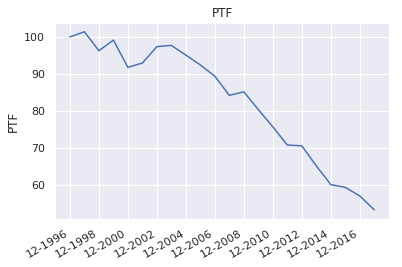

CREATED:  ../03-Graph/Macro_01_PTF.json


In [15]:
sheetname = 'PTF'
full_file_name = '01_PTF'
filename = "PTF.json"
info_header[0]["titulo"] = "Productividad Total de los Factores Construcción"
info_header[0]["Fuente"] = "PTF"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "PTF"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname == 'PTF':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [
        ["PTF Ajst KxEmp y LxHrsEduc", "Var_PTF Ajst KxEmp y LxHrsEduc"]
    ]
    dataCorto = [
        ["PTF", "Var. Mes"]
    ]

    for index, lista in enumerate(data):
        # Nombre de la variable para toolTip // sin tool TiptoolTip_v=[[]]
        toolTip_v = [[]]
        # Nombre de la variable para Json
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                # Nombre de la variable
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + filename.split(".")[0]+".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 2) Macro_02_PML.json

set: None
img PML Chile[Millon Pesos por Persona] PML CHILE
12-1996
12-1997
12-1998
12-1999
12-2000
12-2001
12-2002
12-2003
12-2004
12-2005
12-2006
12-2007
12-2008
12-2009
12-2010
12-2011
12-2012
12-2013
12-2014
12-2015
12-2016
12-2017
22 22
22


<Figure size 432x288 with 0 Axes>

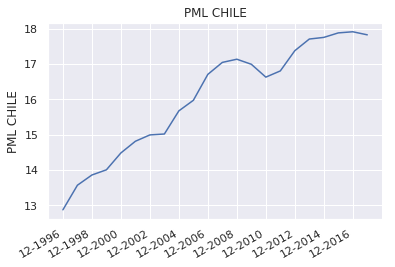

CREATED:  ../03-Graph/Macro_02_PML.json


In [16]:
sheetname = 'PML'
filename = "PML.json"
full_file_name = '02_PML'
info_header[0]["titulo"] = "Productividad Manual Laboral Construcción"
info_header[0]["Fuente"] = "PML"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "PML"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname == 'PML':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ['PML Chile[Millon Pesos por Persona]', 'PML Construcción[Millon Pesos por Persona]']
    variable_meaning = ["PML CHILE", "PML Contruccion"]
    reg_name = ["PML CHILE", "PML Contruccion"]
    toolTip_v = [["varPML"], ["varConst"]]
    toolTip_mening = [["Var. Anual"], ["Var. Anual"]]
                 
    jsonDir = DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)                  

### 3) Macro_03_PIB_part_sector.json

set: None
img Construcción PIB Const.
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
10-2018
11-2018
12-2018
48 48
48


<Figure size 432x288 with 0 Axes>

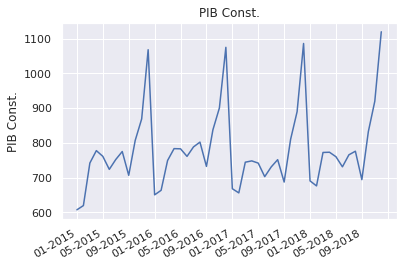

CREATED:  ../03-Graph/Macro_03_PIB_part_sector.json


In [17]:
sheetname = 'PIB part. sector'
filename="PIB part. sector.json"
full_file_name = '03_PIB_part_sector'
info_header[0]["titulo"]="PIB Construcción (MM$)"
info_header[0]["Fuente"]="Banco Central"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="PIB Construccion MM$ "
info_header[0]["linkPlot"] = link_img +init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = "" 

if sheetname=='PIB part. sector':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[["Construcción","Var Mensual Construcción"]]
    dataCorto=[["PIB Const.","Var. Mes"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])

    jsonDir = DataToJson(df, varible_v, variable_meaning, reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)                 

### 4) Macro_04_PIB_segunEc.json 

set: None
img Agropecuario-silvícola PIB
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
10-2018
11-2018
12-2018
48 48
48


<Figure size 432x288 with 0 Axes>

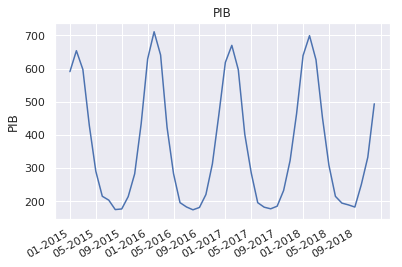

CREATED:  ../03-Graph/Macro_04_PIB_segunEc.json


In [18]:
sheetname = 'PIB part. sector'
filename="PIB_segunEc.json"
full_file_name = '04_PIB_segunEc'
info_header[0]["titulo"]=sheetname
info_header[0]["Fuente"]="Banco Central"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="PIB total MM$: obtenido desde Banco Central"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname=='PIB part. sector':
    df = pd.read_excel( file, sheet_name = sheetname )
    varible_v=[ "Agropecuario-silvícola",
               "Pesca","Minería","Industria Manufacturera",
               "Electricidad, gas, agua y gestión de desechos","Construcción","Comercio",
               "Restaurantes y hoteles","Transporte","Comunicaciones y servicios de información",
               "Servicios financieros","Servicios empresariales","Servicios de vivienda e inmobiliarios",
               "Servicios personales","Administración pública"]
    variable_meaning=["PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB"]
    reg_name=["Agro-sil",
               "Pesca","Minería","Manufac",
               "Elec. y otros","Construcción","Comercio",
               "Rest. hoteles","Transporte","Comunicacion",
               "Financieros","Serv.empre.","Inmobiliarios",
               "Serv. personales","Adm. pública"]
    toolTip_v=[["Var Mensual Agropecuario-silvícola"],["Var Mensual Pesca"],["Var Mensual Minería"],
               ["Var Mensual Industria Manufacturera"],["Var Mensual Electricidad, gas, agua y gestión de desechos"],
               ["Var Mensual Construcción"],["Var Mensual Comercio"],["Var Mensual Restaurantes y hoteles"],
               ["Var Mensual Transporte"],["Var Mensual Comunicaciones y servicios de información"],
               ["Var Mensual Servicios financieros"],["Var Mensual Servicios empresariales"],
               ["Var Mensual Servicios de vivienda e inmobiliarios"],["Var Mensual Servicios personales"],
               ["Var Mensual Administración pública"]]
    
    toolTip_mening=[["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"]]

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file) 

### 5) Macro_05_PIB_region.json 

# Vera was here

In [5]:
sheetname = 'PIB por región' 
filename="PIB_region.json"
full_file_name = '05_PIB_region'
info_header[0]["titulo"]=sheetname + " MM$"
info_header[0]["Fuente"]="Banco Central"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="PIB por región:  obtenido Banco Central"
info_header[0]["linkPlot"]=""
info_header[0]["glosario"]=""

# No es necesario el if si en la misma celda definiste la variable a mano
#if sheetname=='PIB por región':
df = pd.read_excel( file, sheet_name = sheetname)

In [4]:
# Más eficiente que poner las regiones a mano
regiones = df.Region.unique()

# Mi propuesta de bucle

In [8]:
byReg={}
# Mejor region que val
for region in regiones:
    # Entiendo que quieres contruir un dataframe local por región
    ldf = df.query('Region == @region')
    
    # Estos titulos entiendo que son fijos y no los toqué
    varible_v=[ "Agropecuario silvícola","Pesca","Minería","Industriamanufacturera","Electricidad, gas, agua y gestión  de desechos","Construcción",
    "restaurantes y hoteles","información y comunicaciones","financierosy empresariales","de viviendae inmobiliarios","Servicios personales",
    "Administración pública"]
    variable_meaning=["PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB"]
    reg_name=["Agro. Silv.","Pesca","Minería",";Manufacta","Elect. gas, agua y gestión  de desechos","Construcción",
    "restaurantes y hoteles","información y comunicaciones","financieros y empresariales","de vivienda e inmobiliarios","Serv. personales",
    "Administración pública"]
    toolTip_v=[["Var Mensual Agropecuario silvícola"],["Var Mensual Pesca"],["Var Mensual Minería"],["Var Mensual Industriamanufacturera"],["Var Mensual Electricidad, gas, agua y gestión  de desechos"],
    ["Var Mensual Construcción"],["Var Mensual restaurantes y hoteles"],["Var Mensual información y comunicaciones"],["Var Mensual financierosy empresariales"],
    ["Var Mensual de viviendae inmobiliarios"],["Var Mensual Servicios personales"],["Var Mensual Administración pública"]]
    toolTip_mening=[["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"]]

    # seguimos la misma logica pero con el local dataframe => ldf
    byReg[region] = DataToJson(ldf,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    
# Me dió la impresión que ahí terminaba el bucle y tenias un problema de indentación
jsonDir = [info_header, byReg]
name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
jsonUTF8 = json.loads(jsonUTF8)
with open(name_file , 'w') as outfile:
    json.dump(jsonUTF8, outfile,ensure_ascii=False)
print("CREATED: ", name_file)

set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
CREATED:  ../03-Graph/Macro_05_PIB_region.json


In [ ]:
byReg={}
for val in regiones:
    df[df['Region']=="val"]
    varible_v=[ "Agropecuario silvícola","Pesca","Minería","Industriamanufacturera","Electricidad, gas, agua y gestión  de desechos","Construcción",
    "restaurantes y hoteles","información y comunicaciones","financierosy empresariales","de viviendae inmobiliarios","Servicios personales",
    "Administración pública"]
    variable_meaning=["PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB","PIB"]
    reg_name=["Agro. Silv.","Pesca","Minería",";Manufacta","Elect. gas, agua y gestión  de desechos","Construcción",
    "restaurantes y hoteles","información y comunicaciones","financieros y empresariales","de vivienda e inmobiliarios","Serv. personales",
    "Administración pública"]
    toolTip_v=[["Var Mensual Agropecuario silvícola"],["Var Mensual Pesca"],["Var Mensual Minería"],["Var Mensual Industriamanufacturera"],["Var Mensual Electricidad, gas, agua y gestión  de desechos"],
    ["Var Mensual Construcción"],["Var Mensual restaurantes y hoteles"],["Var Mensual información y comunicaciones"],["Var Mensual financierosy empresariales"],
    ["Var Mensual de viviendae inmobiliarios"],["Var Mensual Servicios personales"],["Var Mensual Administración pública"]]
    toolTip_mening=[["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"],["Var. Mes"]]

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    byReg[val]=jsonDir
    jsonDir = [info_header, byReg ]
#         create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
print("CREATED: ", name_file)

# / Vera was here

### 6) Macro_06_Perm_Edif_m2.json

set: None
img Total pais Total pais
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
117 117
117


<Figure size 432x288 with 0 Axes>

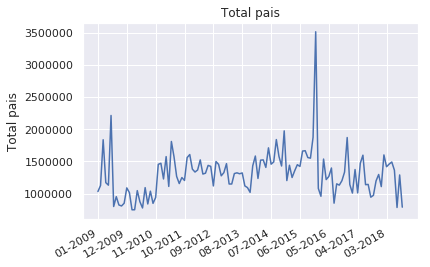

CREATED:  ../03-Graph/Macro_06_Perm_Edif_m2.json


In [20]:
sheetname = 'Perm_Edif'
filename = "Perm_Edif_m2.json"
full_file_name = '06_Perm_Edif_m2'
info_header[0]["titulo"] = 'Permisos Edificación m2'
info_header[0]["Fuente"] = "CChC - INE"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Permiso de Edificación. Fuentes CChC e INE. A partir del año 2009 están agregadas a los permisos de edificación las regiones XIV y XV"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname == 'Perm_Edif':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Total pais",
                 "I",
                 "II",
                 "III",
                 "IV",
                 "V",
                 "VI",
                 "VII",
                 "VIII",
                 "IX",
                 "X",
                 "XI",
                 "XII",
                 "RM",
                 "XIV",
                 "XV"]
    variable_meaning = ["Total pais",
                        "I",
                        "II",
                        "III",
                        "IV",
                        "V",
                        "VI",
                        "VII",
                        "VIII",
                        "IX",
                        "X",
                        "XI",
                        "XII",
                        "RM",
                        "XIV",
                        "XV"]
    reg_name = ["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"]
    toolTip_v = [
        ["Var Total pais","I, C y EF- Total país","Vvda-R:Total país","Serv.-R:Total país"],
        ["Var I","I, C y EF-R:I","Vvda-R:I","Serv.-R:I"],
        ["Var II","I, C y EF-R:II","Vvda-R:II","Serv.-R:II"],
        ["Var III","I, C y EF-R:III","Vvda-R:III","Serv.-R:III"],
        ["Var IV","I, C y EF-R:IV","Vvda-R:IV","Serv.-R:IV"],
        ["Var V","I, C y EF-R:V","Vvda-R:V","Serv.-R:V"],
        ["Var VI","I, C y EF-R:VI","Vvda-R:VI","Serv.-R:VI"],
        ["Var VII","I, C y EF-R:VII","Vvda-R:VII","Serv.-R:VII"],
        ["Var VIII","I, C y EF-R:VIII","Vvda-R:VIII","Serv.-R:VIII"],
        ["Var IX","I, C y EF-R:IX","Vvda-R:IX","Serv.-R:IX"],
        ["Var X","I, C y EF-R:X","Vvda-R:X","Serv.-R:X"],
        ["Var XI","I, C y EF-R:XI","Vvda-R:XI","Serv.-R:XI"],
        ["Var XII","I, C y EF-R:XII","Vvda-R:XII","Serv.-R:XII"],
        ["Var RM","I, C y EF-R:RM","Vvda-R:RM","Serv.-R:RM"],
        ["Var XIV","I, C y EF-R:XIV","Vvda-R:XIV","Serv.-R:XIV"],
        ["Var XV","I, C y EF-R:XV","Vvda-R:XV","Serv.-R:XV"]]
    toolTip_mening = [
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name+".png")
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 7) Macro_07_Perm_Edif_vvda.json

In [21]:
sheetname = 'Perm. Edif. Vvda y M2'
filename = "Perm_Edif_vvda.json"
full_file_name = '07_Perm_Edif_vvda'
info_header[0]["titulo"] = 'Permisos de Edificación Viviendas (M2)'
info_header[0]["Fuente"] = "CChC - INE"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Permiso de Edificación. Fuentes CChC e INE. Para los permisos acumulados, se suman los permisos de todos los meses del año, o hasta el mes con información."
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname == 'Perm. Edif. Vvda y M2':
    df = pd.read_excel(file, sheet_name=sheetname)
    data = [["Total Nº",
         "Permisos Viviendas nuevas Nº", "Permisos Viviendas Ampliaciones Nº",
         "m2 Habitacional Viviendas nuevas", "m2 Habitacional Ampliaciones"]]
    dataCorto = [["Permisos No.", "Vvdas. Nuevas.", "Vvdas. Ampl.",
                  "Vvdas Nuevas m2", "Vvdas Ampl. m2"]]

    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)      

set: None
CREATED:  ../03-Graph/Macro_07_Perm_Edif_vvda.json


### 8) Macro_08_Perm_edif_acumulado.json 

set: None
img Total pais Total pais
01-2009
02-2009
03-2009
04-2009
05-2009
06-2009
07-2009
08-2009
09-2009
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
07-2018
08-2018
09-2018
117 117
117


<Figure size 432x288 with 0 Axes>

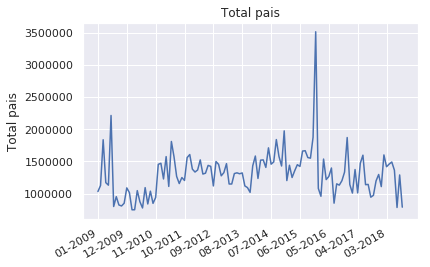

CREATED:  ../03-Graph/Macro_08_Perm_edif_acumulado.json


In [22]:
sheetname = 'Perm.Edif.Acumulado'
filename = "Perm_edif_acumulado.json"
full_file_name = '08_Perm_edif_acumulado'
info_header[0]["titulo"] = 'Permisos Edificación Acumulados (m2)'
info_header[0]["Fuente"] = "CChC - INE"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Permiso de Edificación. Fuentes CChC e INE. Para los permisos acumulados, se suman los permisos de todos los meses del año, o hasta el mes con información"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'Perm.Edif.Acumulado':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Total pais",
                 "I",
                 "II",
                 "III",
                 "IV",
                 "V",
                 "VI",
                 "VII",
                 "VIII",
                 "IX",
                 "X",
                 "XI",
                 "XII",
                 "RM",
                 "XIV",
                 "XV"]
    variable_meaning = ["Total pais",
                        "I",
                        "II",
                        "III",
                        "IV",
                        "V",
                        "VI",
                        "VII",
                        "VIII",
                        "IX",
                        "X",
                        "XI",
                        "XII",
                        "RM",
                        "XIV",
                        "XV"]
    reg_name = ["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"]
    toolTip_v = [
        ["Var Total pais","I, C y EF- Total país","Vvda-R:Total país","Serv.-R:Total país"],
        ["Var I","I, C y EF-R:I","Vvda-R:I","Serv.-R:I"],
        ["Var II","I, C y EF-R:II","Vvda-R:II","Serv.-R:II"],
        ["Var III","I, C y EF-R:III","Vvda-R:III","Serv.-R:III"],
        ["Var IV","I, C y EF-R:IV","Vvda-R:IV","Serv.-R:IV"],
        ["Var V","I, C y EF-R:V","Vvda-R:V","Serv.-R:V"],
        ["Var VI","I, C y EF-R:VI","Vvda-R:VI","Serv.-R:VI"],
        ["Var VII","I, C y EF-R:VII","Vvda-R:VII","Serv.-R:VII"],
        ["Var VIII","I, C y EF-R:VIII","Vvda-R:VIII","Serv.-R:VIII"],
        ["Var IX","I, C y EF-R:IX","Vvda-R:IX","Serv.-R:IX"],
        ["Var X","I, C y EF-R:X","Vvda-R:X","Serv.-R:X"],
        ["Var XI","I, C y EF-R:XI","Vvda-R:XI","Serv.-R:XI"],
        ["Var XII","I, C y EF-R:XII","Vvda-R:XII","Serv.-R:XII"],
        ["Var RM","I, C y EF-R:RM","Vvda-R:RM","Serv.-R:RM"],
        ["Var XIV","I, C y EF-R:XIV","Vvda-R:XIV","Serv.-R:XIV"],
        ["Var XV","I, C y EF-R:XV","Vvda-R:XV","Serv.-R:XV"]]
    toolTip_mening = [
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."],
        ["Var Mes", "I, C y EF", "Vvda", "Serv."]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 9) Macro_09_perm_edif_anio.json

In [23]:
sheetname = 'Permisos edif. año'
filename = "perm_edif_anio.json"
full_file_name = '09_perm_edif_anio'
info_header[0]["titulo"] = 'Permiso de Edificación [m2-%]'
info_header[0]["Fuente"] = "CChC - INE"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Permiso de Edificación." + " Fuentes CChC e INE. A partir del año 2009 están agregadas " +"a los permisos de edificación las regiones XIV y XV"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'Permisos edif. año':
    df = pd.read_excel(file, sheet_name=sheetname)
    regiones = ["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"]
    varible_v = ["Total pais",
                 "I",
                 "II",
                 "III",
                 "IV",
                 "V",
                 "VI",
                 "VII",
                 "VIII",
                 "IX",
                 "X",
                 "XI",
                 "XII",
                 "RM",
                 "XIV",
                 "XV"]
    variable_meaning = ["Total pais",
                        "I",
                        "II",
                        "III",
                        "IV",
                        "V",
                        "VI",
                        "VII",
                        "VIII",
                        "IX",
                        "X",
                        "XI",
                        "XII",
                        "RM",
                        "XIV",
                        "XV"]
    reg_name = ["Total pais",
                "I",
                "II",
                "III",
                "IV",
                "V",
                "VI",
                "VII",
                "VIII",
                "IX",
                "X",
                "XI",
                "XII",
                "RM",
                "XIV",
                "XV"]
    toolTip_v = [["porc_I"], ["porc_II"], ["porc_III"], ["porc_IV"],
                 ["porc_V"], ["porc_VI"], ["porc_VII"],
                 ["porc_VIII"], ["porc_IX"], ["porc_X"],
                 ["porc_XI"], ["porc_XII"], ["porc_RM"], ["porc_XIV"], ["porc_XV"], [], [], [], [], [], [], []]

    # Nombre de la variable para Json
    toolTip_mening = [["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"],
                      ["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"],
                      ["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"], ["Porc"]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

set: None
CREATED:  ../03-Graph/Macro_09_perm_edif_anio.json


### 10) Macro_11_IMACON_varMes.json

set: None
img IMACON varMensual IMACON Var. Mes
04-1989
05-1989
06-1989
07-1989
08-1989
09-1989
10-1989
11-1989
12-1989
01-1990
02-1990
03-1990
04-1990
05-1990
06-1990
07-1990
08-1990
09-1990
10-1990
11-1990
12-1990
01-1991
02-1991
03-1991
04-1991
05-1991
06-1991
07-1991
08-1991
09-1991
10-1991
11-1991
12-1991
01-1992
02-1992
03-1992
04-1992
05-1992
06-1992
07-1992
08-1992
09-1992
10-1992
11-1992
12-1992
01-1993
02-1993
03-1993
04-1993
05-1993
06-1993
07-1993
08-1993
09-1993
10-1993
11-1993
12-1993
01-1994
02-1994
03-1994
04-1994
05-1994
06-1994
07-1994
08-1994
09-1994
10-1994
11-1994
12-1994
01-1995
02-1995
03-1995
04-1995
05-1995
06-1995
07-1995
08-1995
09-1995
10-1995
11-1995
12-1995
01-1996
02-1996
03-1996
04-1996
05-1996
06-1996
07-1996
08-1996
09-1996
10-1996
11-1996
12-1996
01-1997
02-1997
03-1997
04-1997
05-1997
06-1997
07-1997
08-1997
09-1997
10-1997
11-1997
12-1997
01-1998
02-1998
03-1998
04-1998
05-1998
06-1998
07-1998
08-1998
09-1998
10-1998
11-1998
12-1998
01-1999
02-1999


<Figure size 432x288 with 0 Axes>

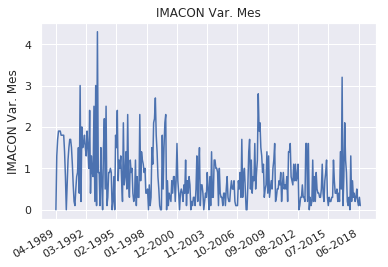

CREATED:  ../03-Graph/Macro_11_IMACON_varMes.json


In [25]:
sheetname = 'IMACON'
filename="IMACON_varMes.json"
full_file_name = '11_IMACON_varMes'
info_header[0]["titulo"]='IMACON Variación Mes' 
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="IMACON, Fuente CChC. Índice con base 2008=100."
info_header[0]["linkPlot"] = link_img +init_data_name + filename.split(".")[0]+".png"
info_header[0]["glosario"] = "" 

if sheetname=='IMACON':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[["IMACON varMensual","IMACON","IMACON varMensualAnual"]]
    dataCorto=[["IMACON Var. Mes","IMACON", "Var. Anual"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 12) Macro_12_IMACON_varAnual.json

allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1989
allNone 1990
allNone 1990
allNone 1990
set: None
img IMACON varMensualAnual IMACON Var. Anual
04-1990
05-1990
06-1990
07-1990
08-1990
09-1990
10-1990
11-1990
12-1990
01-1991
02-1991
03-1991
04-1991
05-1991
06-1991
07-1991
08-1991
09-1991
10-1991
11-1991
12-1991
01-1992
02-1992
03-1992
04-1992
05-1992
06-1992
07-1992
08-1992
09-1992
10-1992
11-1992
12-1992
01-1993
02-1993
03-1993
04-1993
05-1993
06-1993
07-1993
08-1993
09-1993
10-1993
11-1993
12-1993
01-1994
02-1994
03-1994
04-1994
05-1994
06-1994
07-1994
08-1994
09-1994
10-1994
11-1994
12-1994
01-1995
02-1995
03-1995
04-1995
05-1995
06-1995
07-1995
08-1995
09-1995
10-1995
11-1995
12-1995
01-1996
02-1996
03-1996
04-1996
05-1996
06-1996
07-1996
08-1996
09-1996
10-1996
11-1996
12-1996
01-1997
02-1997
03-1997
04-1997
05-1997
06-1997
07-1997
08-1997
09-1997
10-1997
11-1997
12-1997
01-1998
02-1998
03-1998
04-1998
05-1998
06-19

<Figure size 432x288 with 0 Axes>

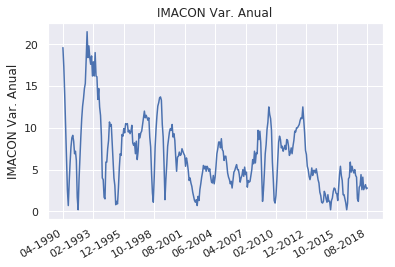

CREATED:  ../03-Graph/Macro_12_IMACON_varAnual.json


In [26]:
sheetname = 'IMACON'
filename="IMACON_varAnual.json"
full_file_name = '12_IMACON_varAnual'
info_header[0]["titulo"]='IMACON Variación Anual'
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="IMACON, Fuente CChC. Índice con base 2008=100. La variación anual corresponde a la variación de un mes respecto al mismo mes del año anterior."
info_header[0]["linkPlot"] = link_img +init_data_name + filename.split(".")[0]+".png"
info_header[0]["glosario"] = "" 

if sheetname=='IMACON':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[["IMACON varMensualAnual","IMACON","IMACON varMensual"]]
    dataCorto=[["IMACON Var. Anual","IMACON","IMACON Var. Mes"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening,norm)    
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 13) Macro_13_INACOR_varMes.json

allNone 2002
set: None
img Nv Actuales XV varMensual Var. Mes
10-2009
11-2009
12-2009
01-2010
02-2010
03-2010
04-2010
05-2010
06-2010
07-2010
08-2010
09-2010
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
105 105
105


<Figure size 432x288 with 0 Axes>

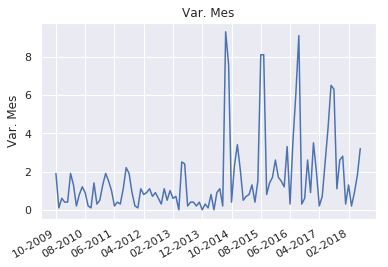

CREATED:  ../03-Graph/Macro_13_INACOR_varMes.json


In [27]:
sheetname = 'INACOR'
filename = "INACOR_varMes.json"
full_file_name = '13_INACOR_varMes'
info_header[0]["titulo"] = "Variación Mes INACOR"
info_header[0]["Fuente"] = "CCHC"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "INACOR, Fuente CChC. Índice con base 2010=100"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'INACOR':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Nv Actuales XV varMensual", "Nv Actuales I varMensual", "Nv Antigua I varMensual",
                 "Nv Actuales II varMensual", "Nv Actuales III varMensual", "Nv Actuales IV varMensual",
                 "Nv Actuales V varMensual", "Nv Actuales VI varMensual", "Nv Actuales VII varMensual",
                 "Nv  Actuales VIII varMensual", "Nv  Actuales IX varMensual", "Nv Actuales XIV varMensual",
                 "Nv Actuales X varMensual", "Nv Antigua X varMensual", "Nv Actuales r XI varMensual",
                 "Nv Actuales r XII varMensual", "Nv Actuales r RM varMensual"]
    variable_meaning = ["Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes",
                        "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes", "Var. Mes"]
    reg_name = ["XV", "I", " Antigua I", "II", "III", "IV", "V", "VI", "VII",
                "Actuales VIII", "Actuales IX", "XIV", "X",
                "Antigua X", "XI", "XII", "RM"]
    toolTip_v = [["Nv Actuales XV", ], ["Nv Actuales I"], ["Nv Antigua I"],
                 ["Nv Actuales II"], ["Nv Actuales III"], ["Nv Actuales IV"],
                 ["Nv Actuales V"], ["Nv Actuales VI"], ["Nv Actuales VII"],
                 ["Nv  Actuales VIII"], ["Nv  Actuales IX"], ["Nv Actuales XIV"],
                 ["Nv Actuales X"], ["Nv Antigua X"], ["Nv Actuales r XI"],
                 ["Nv Actuales r XII"], ["Nv Actuales r RM"]]
    toolTip_mening = [["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"],
                      ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 14) Macro_14_INACOR_varAnual.json

allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2002
allNone 2003
set: None
img Nv Actuales XV varAnual Var. Anual
10-2010
11-2010
12-2010
01-2011
02-2011
03-2011
04-2011
05-2011
06-2011
07-2011
08-2011
09-2011
10-2011
11-2011
12-2011
01-2012
02-2012
03-2012
04-2012
05-2012
06-2012
07-2012
08-2012
09-2012
10-2012
11-2012
12-2012
01-2013
02-2013
03-2013
04-2013
05-2013
06-2013
07-2013
08-2013
09-2013
10-2013
11-2013
12-2013
01-2014
02-2014
03-2014
04-2014
05-2014
06-2014
07-2014
08-2014
09-2014
10-2014
11-2014
12-2014
01-2015
02-2015
03-2015
04-2015
05-2015
06-2015
07-2015
08-2015
09-2015
10-2015
11-2015
12-2015
01-2016
02-2016
03-2016
04-2016
05-2016
06-2016
07-2016
08-2016
09-2016
10-2016
11-2016
12-2016
01-2017
02-2017
03-2017
04-2017
05-2017
06-2017
07-2017
08-2017
09-2017
10-2017
11-2017
12-2017
01-2018
02-2018
03-2018
04-2018
05-2018
06-2018
93 93
93


<Figure size 432x288 with 0 Axes>

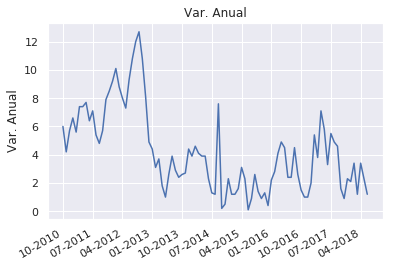

CREATED:  ../03-Graph/Macro_14_INACOR_varAnual.json


In [28]:
sheetname = 'INACOR'
filename = "INACOR_varAnual.json"
full_file_name = '14_INACOR_varAnual'
info_header[0]["titulo"] = "Variación Año INACOR"
info_header[0]["Fuente"] = "CCHC"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "INACOR, Fuente CChC. Índice con base 2010=100. La variación anual corresponde a la variación de un mes respecto al mismo mes del año anterior."
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'INACOR':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Nv Actuales XV varAnual", "Nv Actuales I varAnual", "Nv Antigua I varAnual",
                 "Nv Actuales II varAnual", "Nv Actuales III varAnual", "Nv Actuales IV varAnual",
                 "Nv Actuales V varAnual", "Nv Actuales VI varAnual", "Nv Actuales VII varAnual",
                 "Nv  Actuales VIII varAnual", "Nv  Actuales IX varAnual", "Nv Actuales XIV varAnual",
                 "Nv Actuales X varAnual", "Nv Antigua X varAnual", "Nv Actuales r XI varAnual",
                 "Nv Actuales r XII varAnual", "Nv Actuales r RM varAnual"]
    variable_meaning = ["Var. Anual", "Var. Anual", "Var. Anual",
                        "Var. Anual", "Var. Anual", "Var. Anual",
                        "Var. Anual", "Var. Anual", "Var. Anual",
                        "Var. Anual", "Var. Anual", "Var. Anual",
                        "Var. Anual", "Var. Anual", "Var. Anual",
                        "Var. Anual", "Var. Anual", "Var. Anual"]
    reg_name = ["XV", "I", " Antigua I",
                "II", "III", "IV",
                "V", "VI", "VII",
                "Actuales VIII", "Actuales IX", "XIV",
                "X", "Antigua X", "XI",
                "XII", "RM"]
    toolTip_v = [["Nv Actuales XV", ], ["Nv Actuales I"], ["Nv Antigua I"],
                 ["Nv Actuales II"], ["Nv Actuales III"], ["Nv Actuales IV"],
                 ["Nv Actuales V"], ["Nv Actuales VI"], ["Nv Actuales VII"],
                 ["Nv  Actuales VIII"], ["Nv  Actuales IX"], ["Nv Actuales XIV"],
                 ["Nv Actuales X"], ["Nv Antigua X"], ["Nv Actuales r XI"],
                 ["Nv Actuales r XII"], ["Nv Actuales r RM"]]
    toolTip_mening = [["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"],
                      ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"], ["INACOR"]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 15) Macro_15_Inv_vivienda.json

set: None
img inv. Vivienda Mill. UF Viviendas UF
12-2016
12-2017
12-2018
3 3
3


<Figure size 432x288 with 0 Axes>

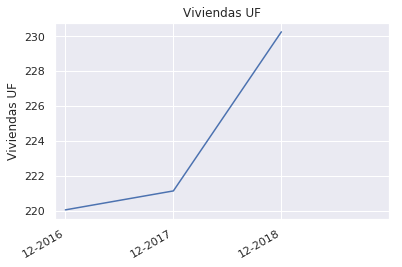

CREATED:  ../03-Graph/Macro_15_Inv_vivienda.json


In [29]:
# Inversión en Vivienda
sheetname = 'Inv. Construcción UF'
filename="Inv_vivienda.json"
full_file_name = '15_Inv_vivienda'
info_header[0]["titulo"]="Inversión vivienda UF.json"
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="Inversión en Construcción Vivienda Fuente: CChC ,(a)	Inversión en programas habitacionales del MINVU, Fondo Nacional de Desarrollo Regional, FNDR, y mejoramiento de barrios."
info_header[0]["linkPlot"] = link_img +init_data_name + filename.split(".")[0]+".png"
info_header[0]["glosario"] = "" 

if sheetname=='Inv. Construcción UF':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[["inv. Vivienda Mill. UF", "inv. Vivienda Pública Mill. UF","inv. Vivienda Privada Mill. UF","Porc_vvPu","Porc_vvPr"]]
    dataCorto=[["Viviendas UF", "Pública","Privada", "Pública/Total","Privada/Total"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

### 16) Macro_16_Inv_Infraestructura.json

set: None
img inv. Infraestructura  Mill. UF Infraestructura UF 
12-2016
12-2017
12-2018
3 3
3


<Figure size 432x288 with 0 Axes>

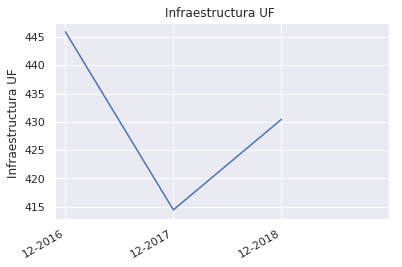

CREATED:  ../03-Graph/Macro_16_Inv_Infraestructura.json


In [30]:
sheetname = 'Inv. Construcción UF'
filename="Inv_Infraestructura.json"
full_file_name = '16_Inv_Infraestructura'
info_header[0]["titulo"]='Inversión en Infraestructura (UF)'
info_header[0]["Fuente"]="CCHC"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="Inversión en Infraestructura Fuente: CChC, (a)	MOP, MINVU, Educación, Salud, Justicia y Ministerio Público, Instituto del Deporte, DGAC, FNDR y mejoramiento urbano. Metro, Serv Sanitarios, Puertos, EFE y Merval (b)	Codelco, Enami, Enap y otros sectores productivos 	 "
info_header[0]["linkPlot"] = link_img +init_data_name + filename.split(".")[0]+".png"
info_header[0]["glosario"] = "" 

if sheetname=='Inv. Construcción UF':
    df = pd.read_excel( file, sheet_name = sheetname )
    data=[
        ["inv. Infraestructura  Mill. UF",
         "inv. Infraestructura Pública  Mill. UF","inv. Infraestructura Productiva Mill. UF",
         "Porc_infPu","Porc_infPr"]]
    dataCorto=[["Infraestructura UF ", "Pública","Privada", "Pública/Total","Privada/Total"]]
    for index,lista in enumerate(data):
        toolTip_v=[[]]
        toolTip_mening=[[]]
        reg_name=["PAIS"]
        for index2,varname in enumerate(lista):
            if index2==0:
                varible_v=[varname ]
                variable_meaning=[dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])

    jsonDir = DataToJson(df,varible_v,variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header,jsonDir ]
    create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

### 17) Macro_17_Trabajadores_prom_anual.json

In [31]:
sheetname = 'Promedios trabajt'
filename = "Trabajadores_prom_anual.json"
full_file_name = '17_Trabajadores_prom_anual'
info_header[0]["titulo"] = "Trabajadores en Construcción. Promedio Anual"
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE y SII. Más información descargar glosario"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname == 'Promedios trabajt':
    df = pd.read_excel(file, sheet_name=sheetname)
    print(df.columns)
    data = [["prom anual Trabaj Const", "var anual Trabaj Const", "Var anual Trabaj total Industrias" ]]
    dataCorto = [["Promedio Miles", "Var Anual","Var Total Ind."]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

Index(['anio', 'Mes', 'mesSTR', 'VIII Trabaj Const', 'XV Trabaj Const',
       'I Trabaj Const', 'II Trabaj Const', 'III Trabaj Const',
       'IV Trabaj Const', 'V Trabaj Const',
       ...
       'Unnamed: 140', 'Unnamed: 141', 'Unnamed: 142', 'Unnamed: 143',
       'Unnamed: 144', 'Unnamed: 145', 'Unnamed: 146', 'Unnamed: 147',
       'Unnamed: 148', 'Unnamed: 149'],
      dtype='object', length=150)
set: nan
CREATED:  ../03-Graph/Macro_17_Trabajadores_prom_anual.json


### 18) Macro_18_Trabajadores_region.json

In [32]:
sheetname = 'Promedios trabajt'
filename = "Trabajadores_region.json"
full_file_name = '18_Trabajadores_region'
info_header[0]["titulo"] = "Trabajadores en Construcción por Región"
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE y SII. Más información descargar glosario"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = "" 

if sheetname == 'Promedios trabajt':
    df = pd.read_excel(file, sheet_name=sheetname)
    regiones = ["VIII ", "XV ", "I ", "II ", "III ", "IV ", "V ",
                "RM ", "VI ", "VII ", "IX ", "XIV ", "X ", "XI ", "XII "]
    varible_v = ["VIII Trabaj Const", "XV Trabaj Const", "I Trabaj Const", "II Trabaj Const",
                 "III Trabaj Const", "IV Trabaj Const", "V Trabaj Const", "RM Trabaj Const",
                 "VI Trabaj Const", "VII Trabaj Const", "IX Trabaj Const", "XIV Trabaj Const", "X Trabaj Const",
                 "XI Trabaj Const", "XII Trabaj Const"]
    variable_meaning = ["VIII Miles de Trab. ", "XV Miles de Trab.", "I Miles de Trab.", "II Miles de Trab.",
                        "III Miles de Trab.", "IV Miles de Trab.", "V Miles de Trab.", "RM Miles de Trab.",
                        "VI Miles de Trab.", "VII Miles de Trab.", "IX Miles de Trab.", "XIV Miles de Trab.", "X Miles de Trab.",
                        "XI Miles de Trab.", "XII Miles de Trab."]
    reg_name = ["VIII ", "XV ", "I ", "II ",
                "III ", "IV ", "V ", "RM ",
                "VI ", "VII ", "IX ", "XIV ", "X ",
                "XI ", "XII "]
    toolTip_v = [
        ['Part trabaj sector const VIII R'], ['Part trabaj sector const XV R'],
        ['Part trabaj sector const I R'], ['Part trabaj sector const II R'],
        ['Part trabaj sector const III R'], ['Part trabaj sector const IV R'],
        ['Part trabaj sector const V R'], ['Part trabaj sector const RM R'],
        ['Part trabaj sector const VI R'], ['Part trabaj sector const VII R'],
        ['Part trabaj sector const IX R'], ['Part trabaj sector const XIV R'],
        ['Part trabaj sector const X R'], ['Part trabaj sector const XI R'],
        ['Part trabaj sector const XII R']]
    toolTip_mening = [["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"],["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"]]
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
#     create_image(df, varible_v[0], variable_meaning[0],"../04-Img/"+init_data_name + full_file_name +".png")
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

set: nan
CREATED:  ../03-Graph/Macro_18_Trabajadores_region.json


### 19) Macro_19_prom_cesantes.json

In [33]:
sheetname = 'Promedios cesantes' 
filename="prom_cesantes.json"
full_file_name = '19_prom_cesantes'
info_header[0]["titulo"]="Cesantia"
info_header[0]["Fuente"]="NENE del INE y SII"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE. Más información descargar glosario"
info_header[0]["linkPlot"]=""
info_header[0]["glosario"]=""

if sheetname == 'Promedios cesantes' :
    df = pd.read_excel(file, sheet_name=sheetname)
    print(df.columns)
    data = [[
        "prom anual Cesante Const", "Var anual Cesante Const",
        "Var anual Cesante total Industrias"]]

    dataCorto = [["Promedio Miles", "Var Anual","Var Total Ind."]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
                
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)    

Index(['anio', 'Mes', 'mesSTR', 'VIII Cesante Const', 'XV Cesante Const',
       'I Cesante Const', 'II Cesante Const', 'III Cesante Const',
       'IV Cesante Const', 'V Cesante Const', 'RM Cesante Const',
       'VI Cesante Const', 'VII Cesante Const', 'IX Cesante Const',
       'XIV Cesante Const', 'X Cesante Const', 'XI Cesante Const',
       'XII Cesante Const', 'prom anual Cesante Const',
       'Var anual Cesante Const', 'Var anual Cesante Const VIII R',
       'Var anual Cesante Const XV R', 'Var anual Cesante Const I R',
       'Var anual Cesante Const II R', 'Var anual Cesante Const III R',
       'Var anual Cesante Const IV R', 'Var anual Cesante Const V R',
       'Var anual Cesante Const RM R', 'Var anual Cesante Const VI R',
       'Var anual Cesante Const VII R', 'Var anual Cesante Const IX R',
       'Var anual Cesante Const XIV R', 'Var anual Cesante Const X R',
       'Var anual Cesante Const XI R', 'Var anual Cesante Const XII R',
       'Cesante total Industrias VII

### 20) Macro_20_sectores_region.json

In [34]:
sheetname = 'Trabajo_sect_Anio'
filename = "sectores_region.json"
full_file_name = '20_sectores_region'
regiones = ['VIII',	'XV',	'I',	'II',	'III',	'IV',	'V',
            'RM',	'VI',	'VII',	'IX',	'XIV',	'X',	'XI',	'XII']

info_header[0]["titulo"] = 'Promedio Trabajadores por Región'
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE y SII. Más información descargar glosario"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'Trabajo_sect_Anio':
    byReg = {}
    for val in regiones:
        df = pd.read_excel(file, sheet_name=sheetname)
        df[df['Region'] == val]
        varible_v = ["452010 - Construcción de edificios completos o de partes de edificios",
                     "452020 - Obras de ingeniería",
                     "451010 - Preparación del terreno, excavaciones y movimientos de tierras",
                     "451020 - Servicios de demolición y el derribo de edificios y otras estructuras",
                     "455000 - Alquiler de equipo de construcción o demolición dotado de operarios",
                     "454000 - Obras menores en construcción (contratistas, albañiles, carpinteros)",
                     "453000 - Acondicionamiento de edificios"]
        variable_meaning = ["Const", "Obras", "Mov. Tierra",
                            "Demolicion", "Alquiler", "obras menores", "Acond. Equipo"]
        reg_name = ["Const", "Obras", "Mov. Tierra", "Demolicion", "Alquiler", 
                    "obras menores", "Acond. Equipo"]
        toolTip_v = [["Var452010 - Construcción de edificios completos o de partes de edificios"],
                     ["Var452020 - Obras de ingeniería"],
                     ["Var451010 - Preparación del terreno, excavaciones y movimientos de tierras"],
                     ["Var451020 - Servicios de demolición y el derribo de edificios y otras estructuras"],
                     ["Var455000 - Alquiler de equipo de construcción o demolición dotado de operarios"],
                     ["Var454000 - Obras menores en construcción (contratistas, albañiles, carpinteros)"],
                     ["Var453000 - Acondicionamiento de edificios"]]
        toolTip_mening = [["Var"], ["Var"],["Var"],["Var"],["Var"],
                          ["Var"], ["Var"],["Var"],["Var"],["Var"],
                          ["Var"], ["Var"],["Var"],["Var"],["Var"]]
        
        jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
        byReg[val] = jsonDir
        jsonDir = [info_header, byReg]
        name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
        jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
        jsonUTF8 = json.loads(jsonUTF8)
        with open(name_file , 'w') as outfile:
            json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)          

set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
set: None
CREATED:  ../03-Graph/Macro_20_sectores_region.json


### 21) Macro_21_part_cesantia_region.json

In [35]:
sheetname = 'Promedios cesantes' 
filename="part_cesantia_region.json "
full_file_name = '21_part_cesantia_region'
info_header[0]["titulo"] = "Cesantía en Contrucción por Región"
info_header[0]["Fuente"] = "NENE del INE y SII"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE y SII. Más información descargar glosario"
info_header[0]["linkPlot"] = ""
info_header[0]["glosario"] = ""

if sheetname == 'Promedios cesantes' :
    df = pd.read_excel(file, sheet_name=sheetname)
    regiones = ["VIII ", "XV ", "I ", "II ", "III ", "IV ", "V ",
                "RM ", "VI ", "VII ", "IX ", "XIV ", "X ", "XI ", "XII "]
    varible_v = ["VIII Cesante Const", "XV Cesante Const", "I Cesante Const", "II Cesante Const",
                 "III Cesante Const", "IV Cesante Const", "V Cesante Const", "RM Cesante Const",
                 "VI Cesante Const", "VII Cesante Const", "IX Cesante Const", "XIV Cesante Const", "X Cesante Const",
                 "XI Cesante Const", "XII Cesante Const"]
    variable_meaning = ["VIII Miles. ", "XV Miles ", "I Miles ", "II Miles",
                        "III Miles", "IV Miles", "V Miles", "RM Miles",
                        "VI Miles", "VII Miles", "IX Miles", "XIV Miles", "X Miles",
                        "XI Miles", "XII Miles"]
    reg_name = ["VIII ", "XV ", "I ", "II ",
                "III ", "IV ", "V ", "RM ",
                "VI ", "VII ", "IX ", "XIV ", "X ",
                "XI ", "XII "]
    toolTip_v = [
          ['Part Cesante sector const VIII R'], 	 ['Part Cesante sector const XV R'], 
        ['Part Cesante sector const I R'], 	 ['Part Cesante sector const II R'], 
        ['Part Cesante sector const III R'], 	 ['Part Cesante sector const IV R'], 
        ['Part Cesante sector const V R'], 	 ['Part Cesante sector const RM R'], 
        ['Part Cesante sector const VI R'], 	 ['Part Cesante sector const VII R'],
        ['Part Cesante sector const IX R'], 	 ['Part Cesante sector const XIV R'],
        ['Part Cesante sector const X R'], 	 ['Part Cesante sector const XI R'],
        ['Part Cesante sector const XII R']]
    toolTip_mening = [["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"],
                      ["Porc. Construcción"], ["Porc. Construcción"], ["Porc. Construcción"]]
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening, norm)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

set: nan
CREATED:  ../03-Graph/Macro_21_part_cesantia_region.json


### 22) Macro_22_formalidad.json

In [36]:
sheetname = 'Ranking Contruccion' 
filename="formalidad.json"
full_file_name = '22_formalidad'
info_header[0]["titulo"]="Ranking Formalidad"
info_header[0]["Fuente"]="NENE del INE y SII"
info_header[0]["LinkDatosOriginales"]=link_data
info_header[0]["comment"]="En el caso de trabajadores dependientes, sólo se consideran los trabajadores del trabajo formal, por medio del pago del empleador a la seguridad social del trabajador (AFP).Cálculo a partir de fuentes Nueva Encuesta Nacional de Empleo, NENE del INE. Más información descargar glosario"
info_header[0]["linkPlot"]=""
info_header[0]["glosario"]=""

if sheetname == 'Ranking Contruccion' :
    df = pd.read_excel("../01-Data/contrato.xlsx", sheet_name=sheetname)
    print(df.columns)
    data = [[
        "Ranking Construccion"]]

    dataCorto = [["Rank"]]
    for index, lista in enumerate(data):
        toolTip_v = [[]]
        toolTip_mening = [[]]
        reg_name = ["PAIS"]
        for index2, varname in enumerate(lista):
            if index2 == 0:
                varible_v = [varname]
                variable_meaning = [dataCorto[index][index2]]
            else:
                toolTip_v[0].append(varname)
                toolTip_mening[0].append(dataCorto[index][index2])
    
    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    name_file = global_dir + "/" + init_data_name + full_file_name + '.json'
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)
    with open(name_file , 'w') as outfile:
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)     

Index(['anio', 'Mes', 'mesSTR', 'Tipo', 'Ranking Construccion'], dtype='object')
set: None
CREATED:  ../03-Graph/Macro_22_formalidad.json
